<a href="https://colab.research.google.com/github/premswaroopmusti/Lets-Grow-More-VIP-Internship-July-2022/blob/main/Task%20-2%5CStock_Market_Prediction_And_Forecasting_Using_Stacked_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **LetsGrowMore (LGMVIP- July2022)**

**Name**: MSSN Prem Swaroop


**Task 2 - Stock Market Prediction And Forecasting Using Stacked LSTM**

Data = https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv

In this model I have used the Stacked LSTM (Long Short Term Memory), a Machine Learning Model for Stock Market Prediction.

 Stock market prediction is the act of trying to determine the future value of a company stock or other financial instrument traded on a financial exchange.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import tensorflow as tf
%matplotlib inline
from warnings import filterwarnings
filterwarnings('ignore')

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv')
df

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
...,...,...,...,...,...,...,...,...
2030,2010-07-27,117.60,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.10,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.80,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.30,122.00,120.25,120.75,120.90,293312,355.17


In [4]:
df.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2035.000000,2035.000000,2035.000000,2035.000000,2035.00000,2.035000e+03,2035.000000
mean,149.713735,151.992826,147.293931,149.474251,149.45027,2.335681e+06,3899.980565
std,48.664509,49.413109,47.931958,48.732570,48.71204,2.091778e+06,4570.767877
min,81.100000,82.800000,80.000000,81.000000,80.95000,3.961000e+04,37.040000
25%,120.025000,122.100000,118.300000,120.075000,120.05000,1.146444e+06,1427.460000
50%,141.500000,143.400000,139.600000,141.100000,141.25000,1.783456e+06,2512.030000
75%,157.175000,159.400000,155.150000,156.925000,156.90000,2.813594e+06,4539.015000
max,327.700000,328.750000,321.650000,325.950000,325.75000,2.919102e+07,55755.080000


In [5]:
df.dtypes

Date                     object
Open                    float64
High                    float64
Low                     float64
Last                    float64
Close                   float64
Total Trade Quantity      int64
Turnover (Lacs)         float64
dtype: object

In [6]:
df = df.reset_index()['Close'] 
df

0       233.75
1       233.25
2       234.25
3       236.10
4       233.30
         ...  
2030    118.65
2031    117.60
2032    120.65
2033    120.90
2034    121.55
Name: Close, Length: 2035, dtype: float64

In [7]:
df.isnull().sum()

0

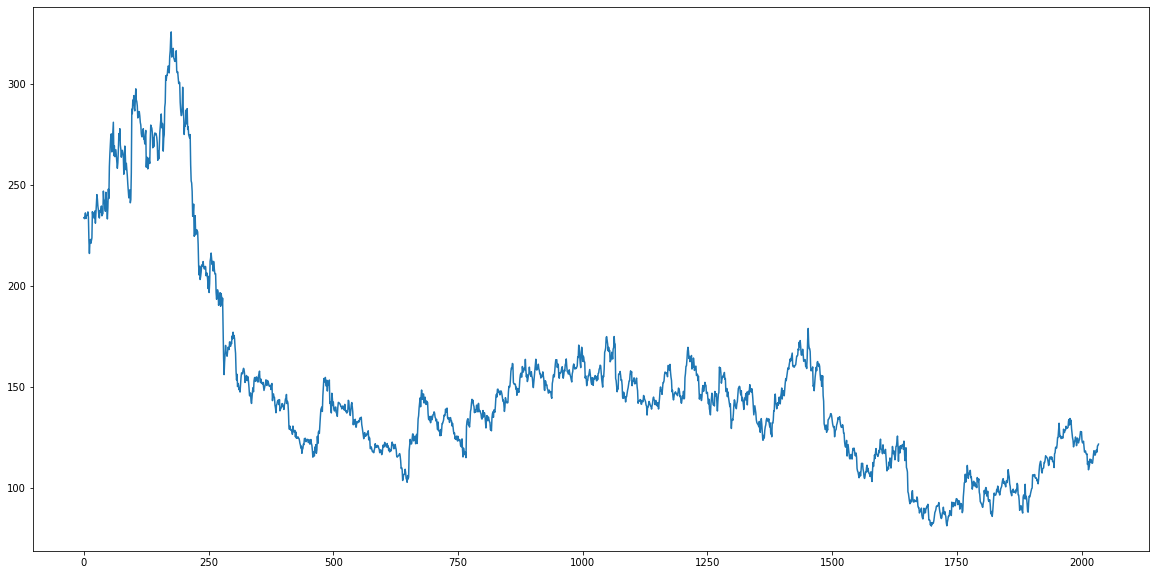

In [8]:
plt.figure(figsize = (20,10))
plt.plot(df)

In [9]:
### LSTM are sensitive to the scale of the data. so we apply MinMaxScaler

In [10]:
scaler = MinMaxScaler(feature_range=(0,1))
df1 = scaler.fit_transform(np.array(df).reshape(-1,1))

In [11]:
print(df1)

[[0.62418301]
 [0.62214052]
 [0.62622549]
 ...
 [0.1621732 ]
 [0.16319444]
 [0.16584967]]


In [12]:
len(df1)

2035

In [13]:
# splitting the dataset into train and test split
training_size = int(len(df1) * 0.65)
test_size = len(df1) - training_size
train_data, test_data = df1[0:training_size,:],df1[training_size:len(df1),:1]

In [14]:
train_data.size, test_data.size

(1322, 713)

In [15]:
# convert an array of values into a dataset matrix
def create_dataset(dataset,time_step = 1 ):
  dataX,dataY = [],[]
  for i in range(len(dataset) - time_step - 1):
    a = dataset[i:(i + time_step),0]
    dataX.append(a)
    dataY.append(dataset[i + time_step, 0])

  return np.array(dataX), np.array(dataY)  

In [16]:
time_step = 100
X_train, Y_train = create_dataset(train_data, time_step)
X_test, Y_test = create_dataset(test_data, time_step)


In [17]:
print(X_train)

[[0.62418301 0.62214052 0.62622549 ... 0.83455882 0.86213235 0.85273693]
 [0.62214052 0.62622549 0.63378268 ... 0.86213235 0.85273693 0.87111928]
 [0.62622549 0.63378268 0.62234477 ... 0.85273693 0.87111928 0.84497549]
 ...
 [0.34517974 0.31781046 0.33047386 ... 0.2816585  0.27001634 0.26531863]
 [0.31781046 0.33047386 0.32128268 ... 0.27001634 0.26531863 0.27389706]
 [0.33047386 0.32128268 0.34007353 ... 0.26531863 0.27389706 0.25347222]]


In [18]:
print(X_train.shape)

(1221, 100)


In [19]:
print(Y_train.shape)

(1221,)


In [20]:
print(X_test.shape)

(612, 100)


In [21]:
print(Y_test.shape)

(612,)


In [22]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [23]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],1) 
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [24]:
### Create the Stacked LSTM model
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.layers import LSTM

In [25]:
model = Sequential()
model.add(LSTM(50,return_sequences = True, input_shape = (100,1)))
model.add(LSTM(50,return_sequences = True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer = 'adam')

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [27]:
model.fit(X_train,Y_train, validation_data = (X_test,Y_test),epochs = 100, batch_size = 64, verbose = 1)

Epoch 1/100
20/20 [==============================] - 13s 361ms/step - loss: 0.0387 - val_loss: 0.0040
Epoch 2/100
20/20 [==============================] - 7s 329ms/step - loss: 0.0046 - val_loss: 0.0022
Epoch 3/100
20/20 [==============================] - 6s 312ms/step - loss: 0.0017 - val_loss: 0.0017
Epoch 4/100
20/20 [==============================] - 6s 317ms/step - loss: 0.0017 - val_loss: 0.0018
Epoch 5/100
20/20 [==============================] - 6s 312ms/step - loss: 0.0016 - val_loss: 0.0013
Epoch 6/100
20/20 [==============================] - 7s 332ms/step - loss: 0.0015 - val_loss: 0.0018
Epoch 7/100
20/20 [==============================] - 6s 312ms/step - loss: 0.0014 - val_loss: 0.0013
Epoch 8/100
20/20 [==============================] - 7s 372ms/step - loss: 0.0013 - val_loss: 0.0016
Epoch 9/100
20/20 [==============================] - 7s 333ms/step - loss: 0.0013 - val_loss: 0.0014
Epoch 10/100
20/20 [==============================] - 6s 308ms/step - loss: 0.0013 - val_l

In [28]:
# lets do the prediction and check performance metrics
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

In [29]:
# transform to original form
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)


In [51]:
# calculate RMSE (Root Mean Squared Error) performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(Y_train, train_predict))

168.07370809297652

In [52]:
math.sqrt(mean_squared_error(Y_test, test_predict))

117.31002443172612

In [53]:
len(test_data)

713

In [62]:
x_input = test_data[613:].reshape(1,-1)
x_input.shape

(1, 100)

In [63]:
x_input

array([[0.12479575, 0.13848039, 0.14011438, 0.13888889, 0.13541667,
        0.14011438, 0.1380719 , 0.13071895, 0.13071895, 0.12867647,
        0.11846405, 0.14644608, 0.14808007, 0.15910948, 0.15992647,
        0.15788399, 0.16441993, 0.17892157, 0.17933007, 0.19260621,
        0.20812908, 0.18974673, 0.18055556, 0.18239379, 0.17708333,
        0.17810458, 0.18055556, 0.17810458, 0.17851307, 0.19607843,
        0.18913399, 0.18954248, 0.19403595, 0.19444444, 0.20200163,
        0.19771242, 0.19934641, 0.19873366, 0.1997549 , 0.2128268 ,
        0.21568627, 0.20445261, 0.21772876, 0.21098856, 0.21425654,
        0.19750817, 0.18811275, 0.17851307, 0.17381536, 0.16033497,
        0.16564542, 0.17116013, 0.17422386, 0.18035131, 0.17401961,
        0.16278595, 0.16973039, 0.17810458, 0.17034314, 0.16830065,
        0.17279412, 0.17544935, 0.18382353, 0.19138072, 0.18913399,
        0.19097222, 0.17238562, 0.16830065, 0.1693219 , 0.17177288,
        0.16156046, 0.14971405, 0.1503268 , 0.15

In [64]:
temp_input = list(x_input)
temp_input = temp_input[0].tolist()
len(temp_input)

100

In [65]:
# demonstrate prediction for next 30 days
from numpy import array
lst_output = []
n_steps = 100
i = 0
while(i<30):
  
  if(len(temp_input)>100):
    temp_input = temp_input[1:]
    x_input = np.array(temp_input)
    print('{} day input {}'.format(i,x_input))
    x_input = x_input.reshape(1,-1)
    x_input = x_input.reshape((1,n_steps,1))
    y_hat = model.predict(x_input, verbose = 0)
    print('{} day output {}'.format(i,y_hat))
    temp_input.extend(y_hat[0].tolist())
    lst_output.extend(y_hat.tolist())
    i = i+1
  else:
    x_input = x_input.reshape((1, n_steps,1))
    y_hat = model.predict(x_input, verbose = 0)
    print(y_hat[0])
    temp_input.extend(y_hat[0].tolist())
    print(len(temp_input))
    lst_output.extend(y_hat.tolist())
    i = i+1

print('Prediction for next 30 days',lst_output)

[0.17022263]
101
1 day input [0.13848039 0.14011438 0.13888889 0.13541667 0.14011438 0.1380719
 0.13071895 0.13071895 0.12867647 0.11846405 0.14644608 0.14808007
 0.15910948 0.15992647 0.15788399 0.16441993 0.17892157 0.17933007
 0.19260621 0.20812908 0.18974673 0.18055556 0.18239379 0.17708333
 0.17810458 0.18055556 0.17810458 0.17851307 0.19607843 0.18913399
 0.18954248 0.19403595 0.19444444 0.20200163 0.19771242 0.19934641
 0.19873366 0.1997549  0.2128268  0.21568627 0.20445261 0.21772876
 0.21098856 0.21425654 0.19750817 0.18811275 0.17851307 0.17381536
 0.16033497 0.16564542 0.17116013 0.17422386 0.18035131 0.17401961
 0.16278595 0.16973039 0.17810458 0.17034314 0.16830065 0.17279412
 0.17544935 0.18382353 0.19138072 0.18913399 0.19097222 0.17238562
 0.16830065 0.1693219  0.17177288 0.16156046 0.14971405 0.1503268
 0.15196078 0.14726307 0.14501634 0.14603758 0.12479575 0.13112745
 0.11397059 0.1190768  0.12377451 0.13562092 0.12908497 0.13459967
 0.12806373 0.13031046 0.12724673 0

In [66]:
day_new = np.arange(1,101)
day_pred = np.arange(101,131)

In [67]:
len(df1)

2035

In [68]:
df3 = df1.tolist()
df3.extend(lst_output)

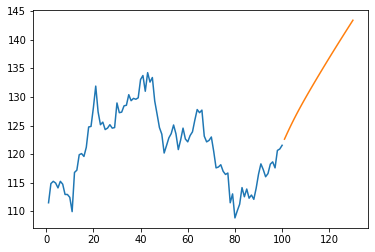

In [69]:
plt.plot(day_new,scaler.inverse_transform(df1[1935:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))